In [ ]:
#@title Version 3 <br> using last trained tokenizer and this time an LSTM layer

## first dataset : final_dataset_1.csv

### Connect to drive

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from google.colab import drive
# print('\nimports done\n mounting drive')
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
!mkdir dataset
!ls

dataset  drive	sample_data


In [ ]:
!cp '/content/drive/MyDrive/datasets/LanguageDataset/final_changes/final_dataset_1.csv' /content/dataset/
! echo copied final_dataset_1

!cp '/content/drive/MyDrive/datasets/LanguageDataset/final_changes/final_dataset_2.csv' /content/dataset/
! echo copied final_dataset_2


copied final_dataset_1
copied final_dataset_2


In [ ]:
data = pd.read_csv('/content/dataset/final_dataset_1.csv')
data

,Language,Source
0,bash,"bash\nalias tail_ls=""ls -l $1 | tail""\n\ntail_..."
1,bash,"ERR_COUNT=`echo $VAR_WITH_TEXT | grep ""ERROR t..."
2,bash,SET JARS=^\n./lib/apache-mime4j-0.6.jar;^\n./l...
3,bash,2010-02-20 21:01 1458414588 s3://file1.tgz.0...
4,bash,pkill /?\n\n[ws@RHDev ~]# pkill $(ps aux | gre...
...,...,...
29995,swift,/* Scale and crop image */\nfunc imageByScalin...
29996,swift,import UIKit\nimport MapKit\n\nclass ViewContr...
29997,swift,html\nUIWebView\nParseConfig\nhtml\nParseConfi...
29998,swift,var array1: [AnyObject!] = []\n\n var key...


### Describing Dataset part 1

Text(0.5, 1.0, 'Dataset')

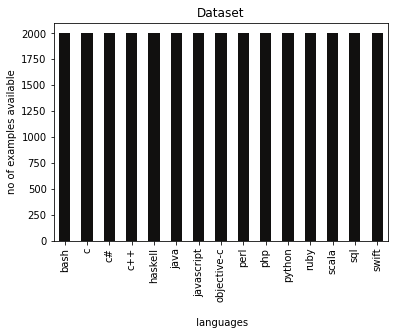

In [ ]:
data.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=False,color='#11100f')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset')

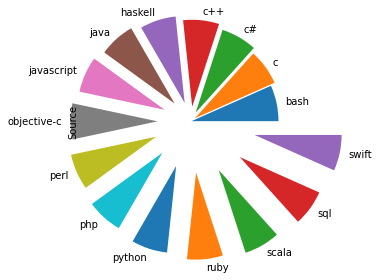

In [ ]:
data.groupby('Language')['Source'].count().plot.pie(explode=[0.01+(0.053*i) for i in range(15)] )

### Dataset is not clean 

### PREPROCESSING OF DATASET USING REGULAR EXPRESSION AND NLTK

In [ ]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
print('.....done')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
.....done


In [ ]:
import re
stopwords_list = stopwords.words('english')
print(len(stopwords_list))

179


In [ ]:
stopwords_list.extend(['left','right','up','down','center','centre'])
print(len(stopwords_list))

185


In [ ]:
stopwords_list.extend(['bottom','start','end','price','location','fix','here'])
print(len(stopwords_list))


192


In [ ]:
def expression1(text):
    # remove single character

    #removing url 
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r'^https?://.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^http?://.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^www?://.*[\r\n]*', '', text, flags=re.MULTILINE)

    text = ' '.join(['' if len(i)==1 else i for i in text.split()])
    
    # text = re.sub('{','',text)
    # text = re.sub('}','',text)
    
    # to remove '(' , ' )' , '[' , ']' ... replaced with a space 
    # text = re.sub('\\(',' ',text)
    # text = re.sub('\\)',' ',text)
    # text = re.sub('\\[',' ',text)
    # text = re.sub('\\]',' ',text)
    # replace . with a space
    # text = re.sub('\\.',' ',text)
    
    # remove unicode
    
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    
    # remove digits
    text = re.sub('[0-9]',' ',text)
    
    #     remove + - * / < >
    text = re.sub('\\+',' ',text)
    text = re.sub('\\=',' ',text)
    text = re.sub('\\-',' ',text)
    text = re.sub('\\*',' ',text)
    text = re.sub('\\/',' ',text)
    # text = re.sub('\\<',' ',text)
    # text = re.sub('\\>',' ',text)
#     text = re.sub('\\:',' ',text)
    
#     text = text.replace(':',r' : ')
    
    
    #     text = ' '.join(text.split())

    # replace single chars again 
    text = ' '.join(['' if len(i)==1 else i for i in text.split()])
    
    # spacing quoted statement
    text = re.sub('"',' " ',text)
    # replace url

    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
        #Replaces url address with "url" 
    # text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
	  # text = re.sub(r'#([^\s]+)', r'\1',text)

    return text

# def replaceURL(text):

def clean_code(text):
  text = expression1(text)
  text_tokens = word_tokenize(text)
  tokens_without_stopwords = [word for word in text_tokens if not word in stopwords_list] 
  # stopwords.words()]
  return ' '.join(tokens_without_stopwords)

print("TRY expresion1")

TRY expresion1


In [ ]:
%%time

line_7210 = data.iloc[15710]['Source']
cleaned_7210 =  clean_code(line_7210)

print(line_7210 , '\n ->',len(line_7210))
print('-'*60,'\n\n')
print(cleaned_7210,'\n ->',len(cleaned_7210))


NSString *url = @"http://stackoverflow.com/questions/ask";

 
 -> 60
------------------------------------------------------------ 


NSString url @ `` 
 -> 17
CPU times: user 8.33 ms, sys: 2.08 ms, total: 10.4 ms
Wall time: 14.3 ms


### Cleaning dataset

In [ ]:
%%time

dataset_refined = data.copy()
print('\n\n->created a copy')
dataset_refined['Source'] =  dataset_refined['Source'].astype(str)
print('\n->as string')
dataset_refined['Source'] =  dataset_refined['Source'].apply(clean_code)
print('\n->cleaned code with expression1')
dataset_refined.to_csv('dataset/cleaned_data_1_v2.csv',index=None)
print('\n->saved cleaned csv , columns : ',dataset_refined.columns)

print('done')



->created a copy

->as string

->cleaned code with expression1

->saved cleaned csv , columns :  Index(['Language', 'Source'], dtype='object')
done
CPU times: user 23.9 s, sys: 34.8 ms, total: 23.9 s
Wall time: 23.9 s


In [ ]:
%%time
print('reading cleaned dataset')
df = pd.read_csv('/content/dataset/cleaned_data_1_v2.csv')

reading cleaned dataset
CPU times: user 116 ms, sys: 24.1 ms, total: 140 ms
Wall time: 143 ms


In [ ]:
df

,Language,Source
0,bash,bash alias tail_ls `` ls tail `` tail_ls etc
1,bash,ERR_COUNT `echo $ VAR_WITH_TEXT grep `` ERROR ...
2,bash,SET JARS lib apache mime .jar ; ^ lib apache m...
3,bash,file .tgz . < br > file .tgz . < br > file .tg...
4,bash,pkill [ ws @ RHDev ~ ] # pkill $ ( ps aux grep...
...,...,...
29995,swift,Scale crop image func imageByScalingAndCroppin...
29996,swift,import UIKit import MapKit class ViewControlle...
29997,swift,html UIWebView ParseConfig html ParseConfig UR...
29998,swift,var array [ AnyObject ! ] [ ] var key `` keySa...


In [ ]:
%%time

df["lang_id"] = df['Language'].factorize()[0]
print('>>> lang id created')
lang_id_df = df[['Language', 'lang_id']].drop_duplicates().sort_values('lang_id')
print('>>> added to dataframe')
lang_to_id = dict(lang_id_df.values)
id_to_lang = dict(lang_id_df[['lang_id', 'Language']].values)
print('>>> now columns : ',df.columns)

>>> lang id created
>>> added to dataframe
>>> now columns :  Index(['Language', 'Source', 'lang_id'], dtype='object')
CPU times: user 12.6 ms, sys: 0 ns, total: 12.6 ms
Wall time: 13.9 ms


In [ ]:
df

,Language,Source,lang_id
0,bash,bash alias tail_ls `` ls tail `` tail_ls etc,0
1,bash,ERR_COUNT `echo $ VAR_WITH_TEXT grep `` ERROR ...,0
2,bash,SET JARS lib apache mime .jar ; ^ lib apache m...,0
3,bash,file .tgz . < br > file .tgz . < br > file .tg...,0
4,bash,pkill [ ws @ RHDev ~ ] # pkill $ ( ps aux grep...,0
...,...,...,...
29995,swift,Scale crop image func imageByScalingAndCroppin...,14
29996,swift,import UIKit import MapKit class ViewControlle...,14
29997,swift,html UIWebView ParseConfig html ParseConfig UR...,14
29998,swift,var array [ AnyObject ! ] [ ] var key `` keySa...,14


In [ ]:
cleaned_df = df.dropna().copy()
len(cleaned_df)

29868

Text(0.5, 1.0, 'Dataset')

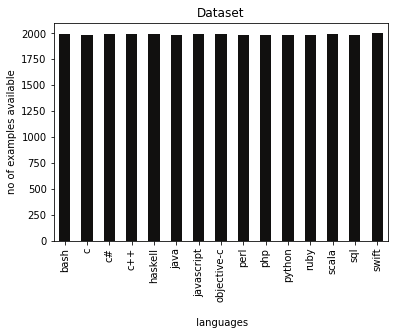

In [ ]:
cleaned_df.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=False,color='#11100f')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset')

### Training test split

In [ ]:
mask = np.random.rand(len(cleaned_df)) > 0.19
print('mask created',type(mask))

mask created <class 'numpy.ndarray'>


In [ ]:
data_1 = cleaned_df[mask]
data_2 = cleaned_df[~mask]
print('created two halves')
print('1st -->',len(data_1) , '\n 2nd-->', len(data_2))

created two halves
1st --> 24226 
 2nd--> 5642


Text(0.5, 1.0, 'Dataset_part_1 - FOR TRAINING')

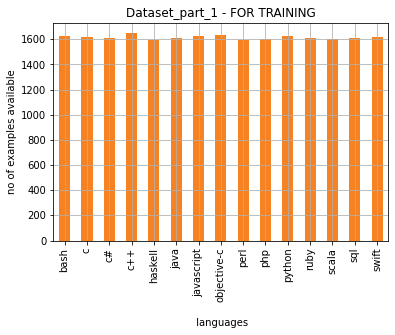

In [ ]:
data_1.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=True,color='#f68222')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset_part_1 - FOR TRAINING')

Text(0.5, 1.0, 'Dataset_part_2 - FOR TESTING')

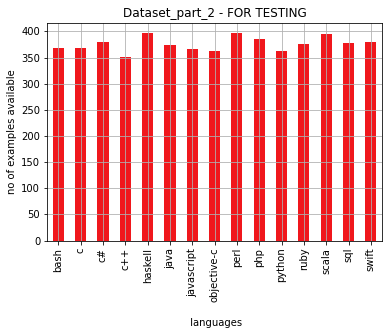

In [ ]:
data_2.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=True,color='#f0171c')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset_part_2 - FOR TESTING')

In [ ]:
import tensorflow as tf

### Tokenizing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:

vocab_size = 10000
trunc_type='post'
oov_tok = "<OOV>"


In [ ]:

# tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
# print('Tokenizer created')
print('using tokenizer trained in previous notebooks')

!cp '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models/tokenizer_Jan5_v3.pickle' '/content/dataset'

!echo done

using tokenizer trained in previous notebooks
done


In [ ]:
import pickle
print('loading pickle')
# loading
with open('/content/dataset/tokenizer_Jan5_v3.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

print('loaded',type(tokenizer))


loading pickle
loaded <class 'keras_preprocessing.text.Tokenizer'>


In [ ]:
# print('fitting on training sentences\n.\n.')

# tokenizer.fit_on_texts(data_1['Source'].values.astype('U'))

# print('.\n.\n.\nfitted on training sentences')
tokenizer

In [ ]:
word_index = tokenizer.word_index
print('len of word index',len(word_index))

len of word index 80691


In [ ]:
# # %%time

# # import pickle

# # # saving
# # with open('tokenizer_model1_run2.pickle', 'wb') as handle:
# #     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
# # print('saved')
# %%time

# import pickle

# # saving
# with open('tokenizer_Jan5_model2.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
# print('saved')

## copy to drive

In [ ]:
# !cp '/content/tokenizer_Jan5_model2.pickle' '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models'
# !echo done

#### Convert training sentences to sequences

In [ ]:
max_length = 1000
trunc_type='post'

In [ ]:
%%time
print('converting training data')
X_train = tokenizer.texts_to_sequences(data_1['Source'].values.astype('U'))
print(' .... converted text to sequences' , type(X_train),'\n ')
print('-'*70)

X_train_padded = pad_sequences(X_train,maxlen=max_length, truncating=trunc_type)

print('sequence padded to ',X_train_padded.shape)

converting training data
 .... converted text to sequences <class 'list'> 
 
----------------------------------------------------------------------
sequence padded to  (24226, 1000)
CPU times: user 4.14 s, sys: 1.38 s, total: 5.52 s
Wall time: 5.53 s


### Converting testing sentences to sequenes

In [ ]:
%%time

X_test = tokenizer.texts_to_sequences(data_2['Source'].values.astype('U'))
print('..converted text to sequences' , type(X_test),'\n ')
print('-'*70)
X_test_padded = pad_sequences(X_test,maxlen=max_length, truncating=trunc_type)
print('sequence padded to ',X_test_padded.shape)

..converted text to sequences <class 'list'> 
 
----------------------------------------------------------------------
sequence padded to  (5642, 1000)
CPU times: user 621 ms, sys: 10 ms, total: 631 ms
Wall time: 632 ms


## Preparing labels

### Training labels

In [ ]:
Y_train = pd.get_dummies(data_1['Language'].values.astype('U'))
print('and Y : ',type(Y_train))
y_train = np.asarray(Y_train)
print(X_train_padded.shape , y_train.shape)

and Y :  <class 'pandas.core.frame.DataFrame'>
(24226, 1000) (24226, 15)


### Testing labels

In [ ]:
Y_test = pd.get_dummies(data_2['Language'].values.astype('U'))
print('and Y : ',type(Y_test))
y_test = np.asarray(Y_test)
print(X_test_padded.shape , y_test.shape)

and Y :  <class 'pandas.core.frame.DataFrame'>
(5642, 1000) (5642, 15)


### Creating the model

In [ ]:
my_model4 = tf.keras.models.Sequential()
print('model created now add layers')

model created now add layers


In [ ]:
# my_model.add(tf.keras.layers.Input(input_shape=2215))
my_model4.add(tf.keras.layers.InputLayer(input_shape=max_length,dtype=tf.int32))
print('\n --> added input layer with max sequence max_features = ',max_length)
my_model4.summary()
# print('added input layer')


 --> added input layer with max sequence max_features =  1000
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
t = len(tokenizer.word_index)
t , t**(0.25)

(80691, 16.854127477710584)

### embedding dim 32

In [ ]:
embed_dim = 32

In [ ]:
my_model4.add(tf.keras.layers.Embedding(vocab_size, embed_dim,input_length = max_length))
print('\n-->added embedding layer with vocab size = ',vocab_size,'embed dim = ',embed_dim,'\n')
my_model4.summary()


-->added embedding layer with vocab size =  10000 embed dim =  32 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          320000    
Total params: 320,000
Trainable params: 320,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.add(Conv1D(filters=128, kernel_size=3, padding='same', dilation_rate=1,activation='relu'))
my_model4.add(tf.keras.layers.Conv1D(128 , 5, padding='valid',kernel_initializer='random_normal'))
print('.\n.\n.\n-->added conv1d layer with 128 filters size = 3, valid padding  ,random_normal initializer')
my_model4.add(tf.keras.layers.MaxPool1D(pool_size=5))
print('added pool layer')
my_model4.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model4.add(tf.keras.layers.Activation('relu'))
print('added relu activation layer')
my_model4.summary()

.
.
.
-->added conv1d layer with 128 filters size = 3, valid padding  ,random_normal initializer
added pool layer
added batch norm layer
added relu activation layer
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          20608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 128)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 199, 128)          512       
_________________________________________________________________
activation (Activation)      (None, 199, 128)          0         
Total params: 341,120
Trainable params: 340,864
Non-trainable params: 256
_______________

In [ ]:
lstm_out = 64
my_model4.add(tf.keras.layers.LSTM(lstm_out))
print('added LSTM layer with units = ',lstm_out)
my_model4.summary()

added LSTM layer with units =  64
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          20608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 128)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 199, 128)          512       
_________________________________________________________________
activation (Activation)      (None, 199, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
Total params: 390,528
Trainable params: 390,272
Non-trainable params: 256
______________

In [ ]:
# # #  tf.keras.layers.GlobalAveragePooling1D(),
# my_model4.add(tf.keras.layers.GlobalAveragePooling1D())
# print('added global average poolinglayer')
# my_model4.summary()
# # my_model3.summary()


In [ ]:
my_model4.add(tf.keras.layers.Dropout(0.5))
print('.\n.\n.\n--> added a 0.5 dropout layer')
my_model4.add(tf.keras.layers.Dense(64,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-7, l2=1e-5)))
print('.\n.\n.\n--> added a dense layer with l1_l2 regularization')
my_model4.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model4.add(tf.keras.layers.Activation('tanh'))
print('added tanh activation layer')
my_model4.add(tf.keras.layers.Flatten())
print('.\n.\n.\n--> flatten layer')
my_model4.summary()

.
.
.
--> added a 0.5 dropout layer
.
.
.
--> added a dense layer with l1_l2 regularization
added batch norm layer
added tanh activation layer
.
.
.
--> flatten layer
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          20608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 128)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 199, 128)          512       
_________________________________________________________________
activation (Activation)      (None, 199, 128)          0         
_________________________________________________________________
lstm (LSTM)          

In [ ]:
# my_model.add(tf.keras.layers.Dense(16))
# print('.\n.\n.\n--> added a dense layer with ')
# my_model.add(tf.keras.layers.BatchNormalization())
# print('added batch norm layer')
# my_model.add(tf.keras.layers.Activation('sigmoid'))
# print('added sigmoid activation layer')
# my_model.add(tf.keras.layers.Flatten())
# print('.\n.\n.\n--> flatten layer')

In [ ]:
num_classes = 15


my_model4.add(tf.keras.layers.Dense(num_classes))
print('--> dense layer of size =  ',num_classes)
my_model4.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model4.add(tf.keras.layers.Activation('sigmoid'))
print('added sigmoid activation layer')
my_model4.add(tf.keras.layers.Flatten())
print('.\n.\n.\n--> flatten layer')
my_model4.add(tf.keras.layers.Activation('softmax'))
print('added final softmax activation layer')

my_model4.summary()

--> dense layer of size =   15
added batch norm layer
added sigmoid activation layer
.
.
.
--> flatten layer
added final softmax activation layer
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          320000    
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          20608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 128)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 199, 128)          512       
_________________________________________________________________
activation (Activation)      (None, 199, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)   

### Model created

In [ ]:
my_model4.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',), loss='categorical_crossentropy', metrics=['accuracy'])
print('--->compiled with learning rate : 0.00001 -')

--->compiled with learning rate : 0.00001 -


### model compiled

### Now training the model

### using k fold cross validation

In [ ]:
from sklearn.model_selection import KFold

# n_fold = 2
# n_fold = 3 
# n_fold = 5
n_fold = 10

k_fold = KFold(n_fold,shuffle=True,random_state=14)

In [ ]:
k_fold


KFold(n_splits=10, random_state=14, shuffle=True)

In [ ]:
%%time

scores = []
histories = []
print('......... fitting the model\n')

for train_iX,test_iX in k_fold.split(X_train_padded):
  # selecting rows for trainX and trainY first train data and then cross validation data
  x_itrain,y_itrain,x_cv,y_cv = X_train_padded[train_iX] , y_train[train_iX] , X_train_padded[test_iX], y_train[test_iX]
    # fit into model with batch sizes of 32 and epochs 10
    # # history = my_model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  history = my_model4.fit(x_itrain,y_itrain,batch_size=64,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  # evaluate model
  loss,acc = my_model4.evaluate(X_test_padded , y_test,verbose=2)
  print('-'*80)
  print('\n\t --> accuracy on test data : {:.6f}% and loss : {:.7f} <--\n'.format(acc * 100.0,loss))
  print('-'*80)
    # # stores scores  
  scores.append(acc)
  histories.append(history)

print('done')

......... fitting the model

Epoch 1/10
341/341 [==============================] - 19s 31ms/step - loss: 2.7209 - accuracy: 0.0741 - val_loss: 2.7155 - val_accuracy: 0.0735
Epoch 2/10
341/341 [==============================] - 10s 30ms/step - loss: 2.7111 - accuracy: 0.0792 - val_loss: 2.6865 - val_accuracy: 0.0991
Epoch 3/10
341/341 [==============================] - 10s 30ms/step - loss: 2.6973 - accuracy: 0.0883 - val_loss: 2.6628 - val_accuracy: 0.1242
Epoch 4/10
341/341 [==============================] - 11s 31ms/step - loss: 2.6797 - accuracy: 0.0991 - val_loss: 2.6415 - val_accuracy: 0.1494
Epoch 5/10
341/341 [==============================] - 9s 27ms/step - loss: 2.6571 - accuracy: 0.1166 - val_loss: 2.6202 - val_accuracy: 0.1762
Epoch 6/10
341/341 [==============================] - 8s 25ms/step - loss: 2.6330 - accuracy: 0.1386 - val_loss: 2.6023 - val_accuracy: 0.2010
Epoch 7/10
341/341 [==============================] - 9s 26ms/step - loss: 2.6181 - accuracy: 0.1593 - val_lo

### save model for later use

In [ ]:
print('saving model...')
my_model4.save('content/Jan5_model3_withLSTM')
print('saved')

saving model...


INFO:tensorflow:Assets written to: content/Jan5_model3_withLSTM/assets


INFO:tensorflow:Assets written to: content/Jan5_model3_withLSTM/assets


saved


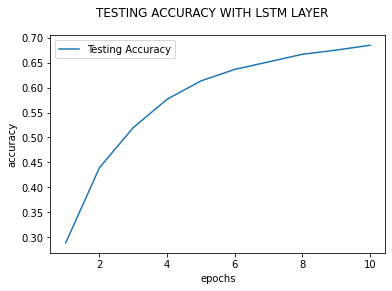

In [ ]:
plt.plot([i for i in range(1,len(scores)+1)] , scores,label='Testing Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.suptitle('TESTING ACCURACY WITH LSTM LAYER')
plt.legend()

In [ ]:
!zip -r /content/Jan5_model3_withLSTM.zip /content/content/Jan5_model3_withLSTM

  adding: content/content/Jan5_model3_withLSTM/ (stored 0%)
  adding: content/content/Jan5_model3_withLSTM/saved_model.pb (deflated 89%)
  adding: content/content/Jan5_model3_withLSTM/assets/ (stored 0%)
  adding: content/content/Jan5_model3_withLSTM/variables/ (stored 0%)
  adding: content/content/Jan5_model3_withLSTM/variables/variables.index (deflated 69%)
  adding: content/content/Jan5_model3_withLSTM/variables/variables.data-00000-of-00001 (deflated 8%)


In [ ]:
!cp '/content/Jan5_model3_withLSTM.zip' '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models'
!echo copied to drive

copied to drive


In [ ]:
%%time
print('saving model backup...')
my_model4.save('Jan5_model3_withLSTM_backup.h5')
print('saved as a h5 file')

saving model backup...
saved as a h5 file
CPU times: user 51.2 ms, sys: 22.8 ms, total: 74 ms
Wall time: 74.9 ms


In [ ]:
!cp '/content/Jan5_model3_withLSTM_backup.h5' '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models'
!echo copied model_backup_h5_file to drive

copied model_backup_h5_file to drive


#### Training curve

In [ ]:
acc = []
for i in range(10):
  acc.extend(histories[i].history['accuracy'])
print(len(acc))

100


In [ ]:
val_acc = []
for i in range(10):
  val_acc.extend(histories[i].history['val_accuracy'])
print(len(acc))

100


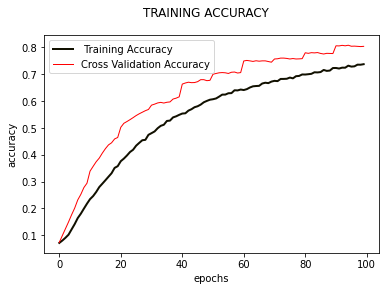

In [ ]:

plt.plot([i for i in range(0,len(acc))] ,acc,label=' Training Accuracy',linewidth=2,color="#111000")
plt.plot([i for i in range(0,len(val_acc))] ,val_acc,label='Cross Validation Accuracy',color="#ff0001",linewidth=1)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.suptitle('TRAINING ACCURACY')
plt.legend()

### Confusion Matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Testing Data

In [ ]:
%%time
predictions_1 = my_model4.predict(X_test_padded)
print('done predicting on test data')
print(type(predictions_1))


done predicting on test data
<class 'numpy.ndarray'>
CPU times: user 1.4 s, sys: 74.8 ms, total: 1.48 s
Wall time: 1.35 s


In [ ]:
predictions_1.shape , y_test.shape

((5642, 15), (5642, 15))

In [ ]:
first_preds = np.argmax(predictions_1,axis=1)
first_preds.shape

(5642,)

In [ ]:
actual_pred = np.argmax(y_test,axis=1)
actual_pred.shape # use these argmax values for confusion matrix

(5642,)

In [ ]:
print('\n','-'*50,'\n')
cnf_matrix1 = confusion_matrix(actual_pred, first_preds)
print(cnf_matrix1)


 -------------------------------------------------- 

[[267   4   6   2   4   8   6   3  21  28   4  12   0   4   0]
 [ 13 223   3  65   7  10   1   5  12  11   7   5   3   3   0]
 [  3   3 228  20   6  42  14   2   8  12   5  11   7  19   0]
 [  5  57  17 206  11  12   2   6   4  11   8   4   2   4   2]
 [  5  10   3   4 299   8   5   6   9  14  16   3   5   2   7]
 [  8   3  94  10   5 179   5   5  16  10   8  15   6   9   1]
 [  3   0   8   2   4   6 292   2   8  19   2  12   3   5   1]
 [  4   6   3   3   5   6   2 297   2  12   5   4   1   4   9]
 [ 20   3   8   2  11  15  10   1 247  26  27  13   4   8   1]
 [ 19   4   7   2   5   8  39   2  10 236  13  12   3  25   1]
 [  7   3   5   3  10  11   4   1  24  18 237  18  12   8   2]
 [  8   4   5   3   4   8   8   3  17  17  19 259   4  16   1]
 [  6   2   2   4  12  17   3   1   3   7   8  11 317   1   1]
 [  4   2   9   1   7  17   4   1  12  12   7  12   1 288   1]
 [  3   2   2   7   5   6   8  48   2   2   4   1   2   0 288]]

In [ ]:
class_names = df['Language'].unique()
class_names

array(['bash', 'c', 'c#', 'c++', 'haskell', 'java', 'javascript',
       'objective-c', 'perl', 'php', 'python', 'ruby', 'scala', 'sql',
       'swift'], dtype=object)

In [ ]:
import seaborn as sns

### Better confusion martrix display
##### source : https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

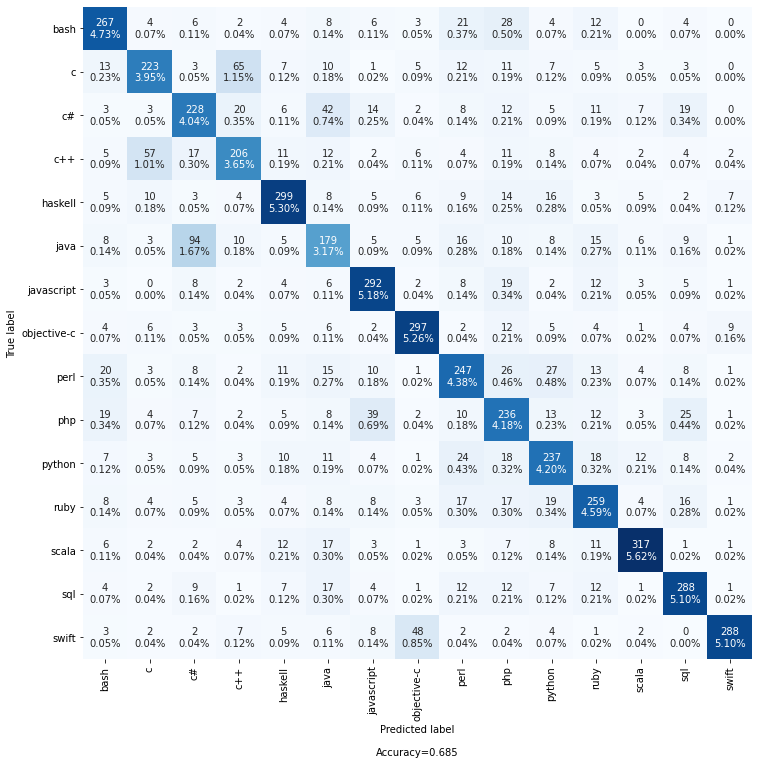

In [ ]:
# make_confusion_matrix(cnf_matrix, figsize=(12,12), cbar=False )
make_confusion_matrix(cnf_matrix1, figsize=(12,12), cbar=False ,categories=class_names)


#### Precision , Recall and F1 Score

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
langs = [i for i in data.Language.unique()]
langs.sort()
langs

['bash',
 'c',
 'c#',
 'c++',
 'haskell',
 'java',
 'javascript',
 'objective-c',
 'perl',
 'php',
 'python',
 'ruby',
 'scala',
 'sql',
 'swift']

In [ ]:
def print_metrics(predictions):
  precision , recall , fscore , support = score( actual_pred, predictions)
  print('-'*80)
  print('{:10}\t | {:7}\t |  {:12}|\t{}'.format('   Language','  Precision',' Recall',' F1 Measure'))
  print('-'*80)
  for i in range(len(langs)):
    
    result = '{:10}\t |{:13.5}\t |{:10.5}\t|\t{:10.5}'.format(str('   '+langs[i]),precision[i],recall[i],fscore[i])
    print(result,end='\n')
    print('-'*80)


In [ ]:
print_metrics(first_preds)


--------------------------------------------------------------------------------
   Language	 |   Precision	 |   Recall     |	 F1 Measure
--------------------------------------------------------------------------------
   bash   	 |        0.712	 |   0.72358	|	   0.71774
--------------------------------------------------------------------------------
   c      	 |      0.68405	 |   0.60598	|	   0.64265
--------------------------------------------------------------------------------
   c#     	 |         0.57	 |       0.6	|	   0.58462
--------------------------------------------------------------------------------
   c++    	 |      0.61677	 |   0.58689	|	   0.60146
--------------------------------------------------------------------------------
   haskell	 |      0.75696	 |   0.75505	|	   0.75601
--------------------------------------------------------------------------------
   java   	 |      0.50708	 |   0.47861	|	   0.49243
----------------------------------------------------------

### creating another for just testing something

In [ ]:
my_model5 = tf.keras.models.Sequential()
print('model created now add layers')

model created now add layers


In [ ]:
# my_model.add(tf.keras.layers.Input(input_shape=2215))
my_model5.add(tf.keras.layers.InputLayer(input_shape=max_length,dtype=tf.int32))
print('----> added input layer with max sequence max_features = ',max_length)
my_model5.summary()
# print('added input layer')

----> added input layer with max sequence max_features =  1000
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model5.add(tf.keras.layers.Embedding(vocab_size, embed_dim,input_length = max_length))
print('\n-->added embedding layer with vocab size = ',vocab_size,'embed dim = ',embed_dim)
my_model5.summary()


-->added embedding layer with vocab size =  10000 embed dim =  32
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
Total params: 320,000
Trainable params: 320,000
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model.add(Conv1D(filters=128, kernel_size=3, padding='same', dilation_rate=1,activation='relu'))
my_model5.add(tf.keras.layers.Conv1D(128 , 5, padding='same',kernel_initializer='random_normal'))
print('.\n.\n.\nadded conv1d layer with valid padding random_normal initializer - 128 filters')
my_model5.add(tf.keras.layers.MaxPool1D(pool_size=5))
print('added pool layer')
my_model5.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model5.add(tf.keras.layers.Activation('relu'))
print('added relu activation layer')
my_model5.summary()


.
.
.
added conv1d layer with valid padding random_normal initializer - 128 filters
added pool layer
added batch norm layer
added relu activation layer
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 128)         20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 128)          512       
_________________________________________________________________
activation_4 (Activation)    (None, 200, 128)          0         
Total params: 341,120
Trainable params: 340,864
Non-trainable params: 256
__________________________

In [ ]:
# model.add(Conv1D(filters=128, kernel_size=3, padding='same', dilation_rate=1,activation='relu'))
my_model5.add(tf.keras.layers.Conv1D(64 , 5, padding='same',kernel_initializer='random_normal'))
print('.\n.\n.\nadded conv1d layer with valid padding random_normal initializer - 128 filters')
my_model5.add(tf.keras.layers.MaxPool1D(pool_size=5))
print('added pool layer')
my_model5.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model5.add(tf.keras.layers.Activation('relu'))
print('added relu activation layer')
my_model5.summary()


.
.
.
added conv1d layer with valid padding random_normal initializer - 128 filters
added pool layer
added batch norm layer
added relu activation layer
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 128)         20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 128)          512       
_________________________________________________________________
activation_4 (Activation)    (None, 200, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None

In [ ]:
lstm_out = 64
my_model5.add(tf.keras.layers.LSTM(lstm_out))
print('added LSTM layer with units = ',lstm_out)
my_model5.summary()

added LSTM layer with units =  64
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 128)         20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 128)          512       
_________________________________________________________________
activation_4 (Activation)    (None, 200, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 200, 64)           41024     
_________________________________________________________________
max_pooling1d_2 (Max

In [ ]:
my_model5.add(tf.keras.layers.Dropout(0.5))
print('.\n.\n.\n--> added a 0.5 dropout layer')
my_model5.add(tf.keras.layers.Dense(64,kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-7, l2=1e-5)))
print('.\n.\n.\n--> added a dense layer with l1_l2 regularization')
my_model5.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model5.add(tf.keras.layers.Activation('tanh'))
print('added tanh activation layer')
my_model5.add(tf.keras.layers.Flatten())
print('.\n.\n.\n--> flatten layer')
my_model5.summary()

.
.
.
--> added a 0.5 dropout layer
.
.
.
--> added a dense layer with l1_l2 regularization
added batch norm layer
added tanh activation layer
.
.
.
--> flatten layer
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 128)         20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 128)          512       
_________________________________________________________________
activation_4 (Activation)    (None, 200, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)  

In [ ]:
num_classes

15

In [ ]:
my_model5.add(tf.keras.layers.Dense(num_classes))
print('--> dense layer of size =  ',num_classes)
my_model5.add(tf.keras.layers.BatchNormalization())
print('added batch norm layer')
my_model5.add(tf.keras.layers.Activation('sigmoid'))
print('added sigmoid activation layer')
my_model5.add(tf.keras.layers.Flatten())
print('.\n.\n.\n--> flatten layer')
my_model5.add(tf.keras.layers.Activation('softmax'))
print('added final softmax activation layer')
my_model5.summary()

--> dense layer of size =   15
added batch norm layer
added sigmoid activation layer
.
.
.
--> flatten layer
added final softmax activation layer
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 32)          320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 128)         20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 200, 128)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 200, 128)          512       
_________________________________________________________________
activation_4 (Activation)    (None, 200, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 200,

In [ ]:
my_model5.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',), loss='categorical_crossentropy', metrics=['accuracy'])
print(' ---> compiled with learning rate : 0.00001 -')

 ---> compiled with learning rate : 0.00001 -


In [ ]:
%%time

scores2 = []
histories2 = []
print('------> fitting the model\n')

for train_iX,test_iX in k_fold.split(X_train_padded):
  # selecting rows for trainX and trainY first train data and then cross validation data
  x_itrain,y_itrain,x_cv,y_cv = X_train_padded[train_iX] , y_train[train_iX] , X_train_padded[test_iX], y_train[test_iX]
    # fit into model with batch sizes of 32 and epochs 10
    # # history = my_model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  history = my_model5.fit(x_itrain,y_itrain,batch_size=128,epochs=10,verbose=1,validation_data=(x_cv,y_cv))
  # evaluate model
  loss,acc = my_model5.evaluate(X_test_padded , y_test,verbose=2)
  print('-'*80)
  print('\n\t --> accuracy on test data : {:.6f}% and loss : {:.7f} <--\n'.format(acc * 100.0,loss))
  print('-'*80)
    # # stores scores  
  scores2.append(acc)
  histories2.append(history)

print('done')

------> fitting the model

Epoch 1/10
171/171 [==============================] - 8s 34ms/step - loss: 2.7289 - accuracy: 0.0665 - val_loss: 2.7133 - val_accuracy: 0.0689
Epoch 2/10
171/171 [==============================] - 5s 31ms/step - loss: 2.7154 - accuracy: 0.0749 - val_loss: 2.7143 - val_accuracy: 0.0735
Epoch 3/10
171/171 [==============================] - 5s 31ms/step - loss: 2.7090 - accuracy: 0.0801 - val_loss: 2.7038 - val_accuracy: 0.0809
Epoch 4/10
171/171 [==============================] - 6s 32ms/step - loss: 2.7072 - accuracy: 0.0805 - val_loss: 2.6901 - val_accuracy: 0.0875
Epoch 5/10
171/171 [==============================] - 5s 32ms/step - loss: 2.6993 - accuracy: 0.0920 - val_loss: 2.6825 - val_accuracy: 0.0991
Epoch 6/10
171/171 [==============================] - 5s 32ms/step - loss: 2.6925 - accuracy: 0.0927 - val_loss: 2.6758 - val_accuracy: 0.0966
Epoch 7/10
171/171 [==============================] - 6s 33ms/step - loss: 2.6833 - accuracy: 0.0999 - val_loss: 2.

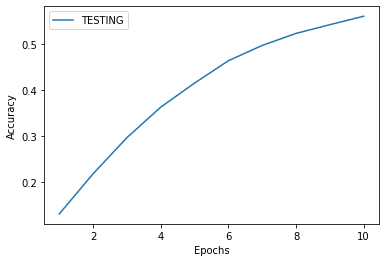

In [ ]:
plt.plot([i for i in range(1,11)],scores2,label='TESTING')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Training Curves

In [ ]:
acc2 = []
for i in range(10):
  acc2.extend(histories2[i].history['accuracy'])
print(len(acc2))
val_acc2 = []
for i in range(10):
  val_acc2.extend(histories2[i].history['val_accuracy'])
print(len(val_acc2))


100
100


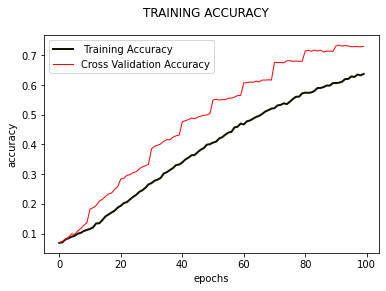

In [ ]:

plt.plot([i for i in range(0,len(acc2))] ,acc2,label=' Training Accuracy',linewidth=2,color="#111000")
plt.plot([i for i in range(0,len(val_acc2))] ,val_acc2,label='Cross Validation Accuracy',color="#ff0001",linewidth=1)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.suptitle('TRAINING ACCURACY')
plt.legend()

In [ ]:
print('saving model...')
my_model5.save('content/Jan5_model3_withLSTM_with2ConvLayers')
print('saved')

saving model...


INFO:tensorflow:Assets written to: content/Jan5_model3_withLSTM_with2ConvLayers/assets


INFO:tensorflow:Assets written to: content/Jan5_model3_withLSTM_with2ConvLayers/assets


saved


In [ ]:
!zip -r /content/Jan5_model3_withLSTM_with2ConvLayers.zip /content/content/Jan5_model3_withLSTM_with2ConvLayers


  adding: content/content/Jan5_model3_withLSTM_with2ConvLayers/ (stored 0%)
  adding: content/content/Jan5_model3_withLSTM_with2ConvLayers/saved_model.pb (deflated 89%)
  adding: content/content/Jan5_model3_withLSTM_with2ConvLayers/assets/ (stored 0%)
  adding: content/content/Jan5_model3_withLSTM_with2ConvLayers/variables/ (stored 0%)
  adding: content/content/Jan5_model3_withLSTM_with2ConvLayers/variables/variables.index (deflated 71%)
  adding: content/content/Jan5_model3_withLSTM_with2ConvLayers/variables/variables.data-00000-of-00001 (deflated 8%)


In [ ]:
!cp '/content/Jan5_model3_withLSTM_with2ConvLayers.zip' '/content/drive/My Drive/datasets/LanguageDataset/final_changes/DL_models'
!echo copied to drive

copied to drive


In [ ]:
%%time
predictions_2 = my_model5.predict(X_test_padded)
print('done predicting on test data')
print(type(predictions_2),predictions_2.shape)


done predicting on test data
<class 'numpy.ndarray'> (5642, 15)
CPU times: user 1.05 s, sys: 71.2 ms, total: 1.12 s
Wall time: 976 ms


In [ ]:
second_preds = np.argmax(predictions_2,axis=1)
second_preds.shape

(5642,)

In [ ]:
print('\n','-'*50,'\n')
cnf_matrix2 = confusion_matrix(actual_pred, second_preds)
print(cnf_matrix2)


 -------------------------------------------------- 

[[235  18   4   3   6   8  11   9  11  29   8  10   3   6   8]
 [ 16 210   7  57  13   4   1  10  13   5   8  11   5   5   3]
 [  4  11 142  25  12  82  20  19   7   9   4  10   5  22   8]
 [ 15  54  24 187   8  10   2  14   5   3   7   8   3   6   5]
 [  4  11  10  17 235   9   5  20  18   9  12  15   8   1  22]
 [ 11   5  93   7  16 137   5  20   7  13  11  20  18   5   6]
 [  4   2   6   3   9   5 265  11   5  19   8  10   2  12   6]
 [  2   7   8  12  10   7  14 253   9   4   5   2   1  12  17]
 [ 23  14   2   5  23  13  20  18 147  19  67  24   7  10   4]
 [ 36   9   8   3  10  14  42   8  10 174  21  12   3  29   7]
 [ 12   6   3   5  13   7   9  14  33  20 167  39  17  13   5]
 [ 11   6  11   2  13  11  18  12  16  22  34 179  20  16   5]
 [  6   8  11   7   8  29   4   2   5   7   8   8 281   4   7]
 [  2   6  10   7   4  10  10   8   5  17   2  15   6 272   4]
 [  2   2   5   6   9   5  12  39   2   1   6   1   4   2 284]]

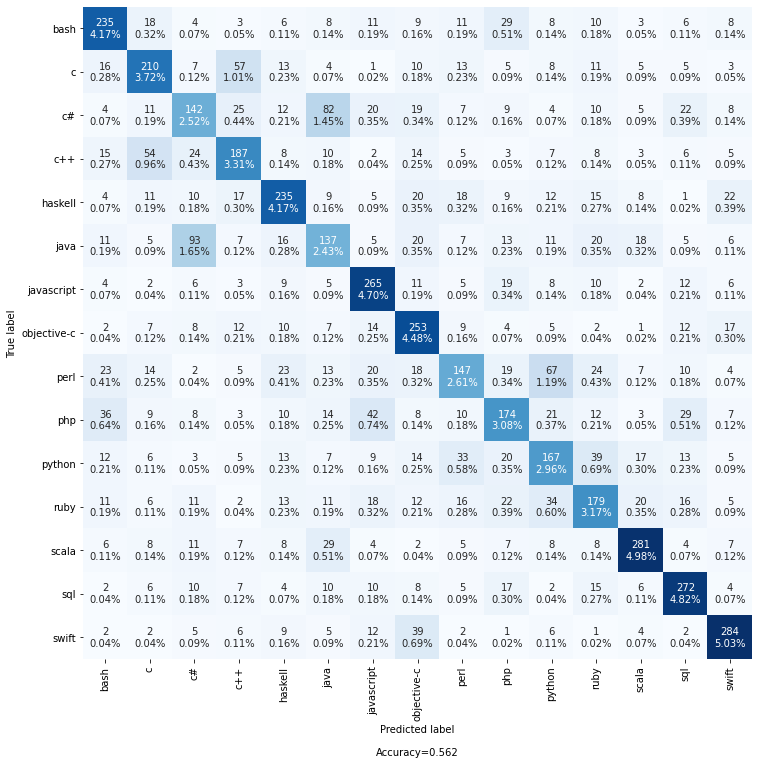

In [ ]:
# make_confusion_matrix(cnf_matrix, figsize=(12,12), cbar=False )
make_confusion_matrix(cnf_matrix2, figsize=(12,12), cbar=False ,categories=class_names)
